# Large Random Samples

### Desigualdade de Markov

$$
P(X \geq t) \leq \frac{E[X^n]}{t^n}, ~dado~que~P(X \geq 0) = 1, t > 0
$$

### Desigualdade de Chebyshev 

Seja $X$ uma variável aleatória em que o segundo momento é finito. Então, $\forall t > 0$.

$$
P(|X - E[X]| \geq t) \leq \frac{Var[X]}{t^2} 
$$

### Propriedades Importantes

- $X_1, ..., X_n$ amostra aleatória (por definição mesma distribuição e independentes), com média $\mu$ e variância $\sigma^2$. Então $E[\bar{X_n}] = \mu$ e $Var[\bar{X_n}] = \sigma^2/n$.  

#### Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Exemplo 6.2.2

Um engenheiro ambiental acredita que existam dois contaminantes na água: arsênico e chumbo. Suponha que ambas são variáveis aleatórias **independentes** $X$ e $Y$, medidas na mesma unidade. O engenheiro está interessado em saber a proporção de contaminação por chumbo em média, isto é, $E[R] = E[Y/(X + Y)]$.

Como nem sempre conhecemos a distribuição de R, podemos aproximar o valor esperado através de uma média amostral de $R$, através de observações $(X_1, Y_1), ..., (X_n, Y_n)$.

Usando a desigualdade de Chebyshev, (tente ver que $Var[R] \leq 1$).

$$
P(|\bar{R_n} - E[R]| \geq \epsilon) \leq \frac{1}{n\epsilon^2}
$$

In [22]:
# Usando apenas Chebyshev: 

epsilon = 0.005
prob = 0.98  # probabilidade mínima de que a diferença entre a 
             # média amostral e o valor esperado seja menor do que epsilon

def get_number_simulations(epsilon, prob):
    
    assert prob >= 0 
    assert prob <= 1
    
    # Queremos que P <= 1 - prob-> 1/(n*eps**2) <= 1 - prob
    
    min_n = 1/((1 - prob)*(epsilon**2))
    min_n = np.ceil(min_n)
    
    print('The minimum number of simulations are: {}'. format(int(min_n)))
    return min_n

def get_epsilon(prob, n): 
    
    assert prob >= 0 
    assert prob <= 1
    
    # Queremos encontrar epsilon para que 1/(n*eps**2) = 1 - prob
    
    eps = np.sqrt(1/(n*(1 - prob)))
    return eps

get_number_simulations(epsilon, prob)

The minimum number of simulations are: 2000000


2000000.0

In [38]:
# Testando com distribuição uniforme (X e Y tem distribuições uniformes)
# Nesse caso, podemos provar que E[R] = 0.5

probs = [0.6, 0.75, 0.9, 0.95, 0.99]

n_range = np.array([j*10**i for i in [2,3,4,5,6,7] for j in [1,2,3,4,5,6,7,8,9]])
E_R = []

for n in n_range:
    X = np.random.uniform(size = int(n))
    Y = np.random.uniform(size = int(n))
    R = Y/(X + Y)
    E_R.append(np.mean(R))

chebyshev_interval = np.empty(shape = (len(probs), len(n_range)))
for i, prob in enumerate(probs): 
    chebyshev_interval[i, :] = get_epsilon(prob, n_range)

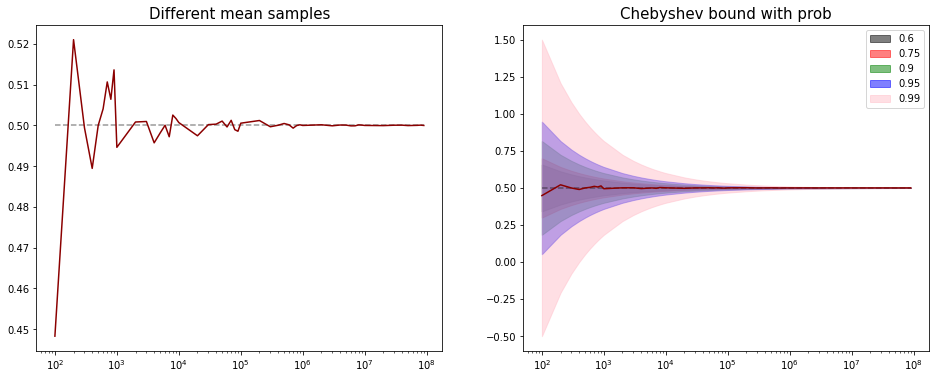

In [39]:
# Plotando
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

for i in [0,1]:
    ax[i].plot(n_range, E_R, color = 'darkred')
    ax[i].hlines(0.5, xmin = min(n_range), xmax = max(n_range), 
                 linestyle = '--',alpha = 0.4, color = 'black')
    ax[i].set_xscale('log')

colors = ['black', 'red', 'green', 'blue', 'pink']
for i in range(len(probs)): 
    ax[1].fill_between(x = n_range, y1 = 0.5 + chebyshev_interval[i,:], 
                                y2 = 0.5 - chebyshev_interval[i,:], 
                   color = colors[i], alpha = 0.5, label = probs[i])
ax[1].legend()
ax[0].set_title('Different mean samples', fontsize = 15)
ax[1].set_title('Chebyshev bound with prob', fontsize = 15)

plt.show()